<a href="https://colab.research.google.com/github/Vaishnavi123-abhi/NNDL-HW2/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.2511 - accuracy: 0.9240 - val_loss: 0.1161 - val_accuracy: 0.9637
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1004 - accuracy: 0.9692 - val_loss: 0.0828 - val_accuracy: 0.9739
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.0698 - val_accuracy: 0.9787
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0559 - accuracy: 0.9819 - val_loss: 0.0637 - val_accuracy: 0.9794
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9844 - val_loss: 0.0622 - val_accuracy: 0.9803
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.0671 - val_accuracy: 0.9820
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0686 - val_accuracy: 0.9810
Epoch 

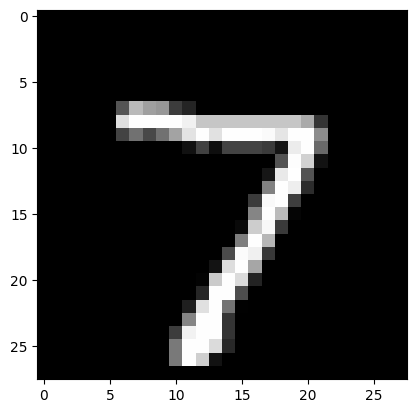

1/1 [==============================] - 0s 49ms/step
Model prediction: 7


In [60]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
          epochs=20, batch_size=128)

# plot one of the images in the test data
plt.imshow(x_test[0], cmap='gray')
plt.show()

# make a prediction on the image using the trained model
prediction = model.predict(x_test[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))


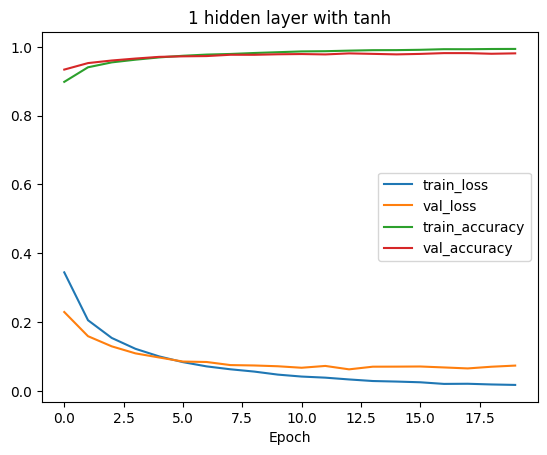

1 hidden layer with tanh - Test loss: 0.0734, Test accuracy: 0.9813


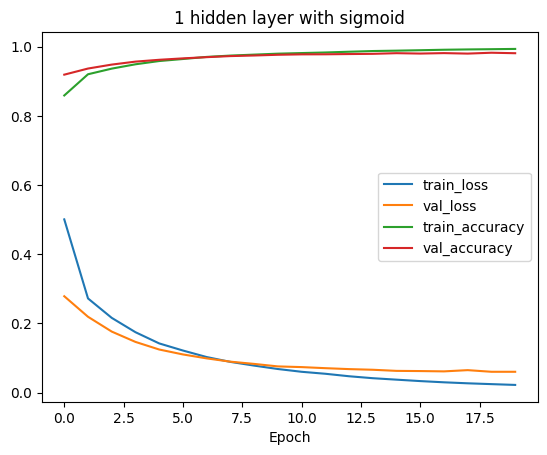

1 hidden layer with sigmoid - Test loss: 0.0602, Test accuracy: 0.9813


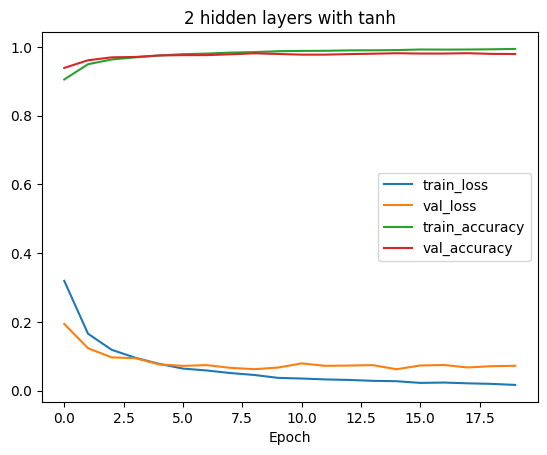

2 hidden layers with tanh - Test loss: 0.0725, Test accuracy: 0.9793


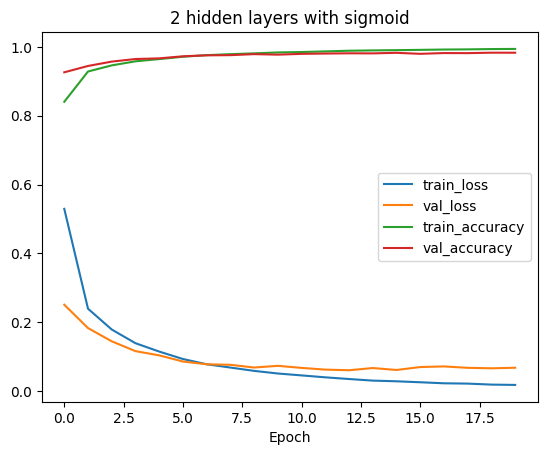

2 hidden layers with sigmoid - Test loss: 0.0677, Test accuracy: 0.9831


In [62]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))


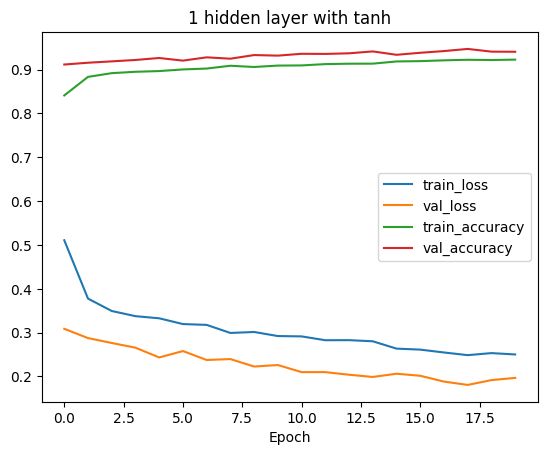

1 hidden layer with tanh - Test loss: 0.1967, Test accuracy: 0.9408


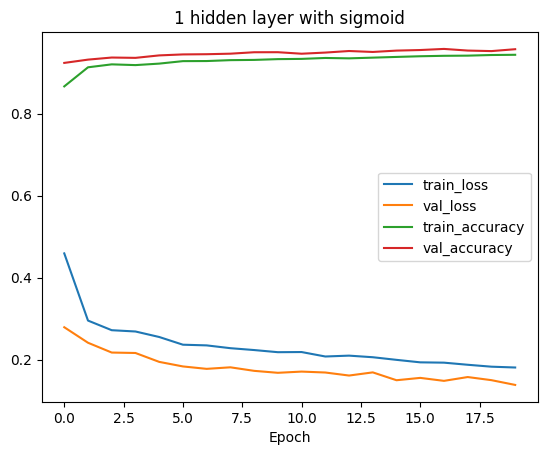

1 hidden layer with sigmoid - Test loss: 0.1387, Test accuracy: 0.9572


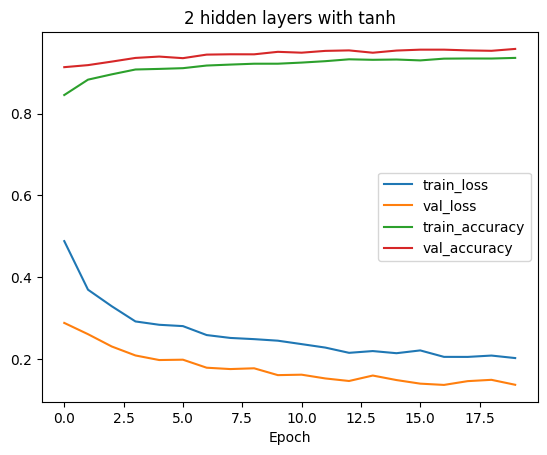

2 hidden layers with tanh - Test loss: 0.1370, Test accuracy: 0.9580


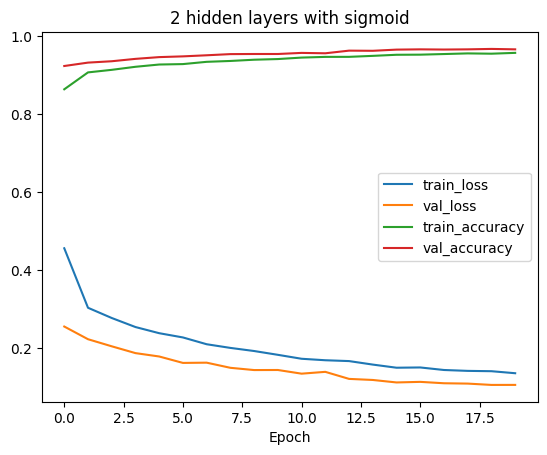

2 hidden layers with sigmoid - Test loss: 0.1059, Test accuracy: 0.9663


In [63]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))
